# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Trabalho

1) Trabalhar os Realces das imagens

1.1 - Convolução

1.2 - Correlação


### Bibliotecas Utilizadas

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import scipy.signal
from scipy import ndimage
import imageio
from skimage import color, img_as_float
import matplotlib.pyplot as pp
from math import floor 

### Carregando Imagem que iremos trabalhar

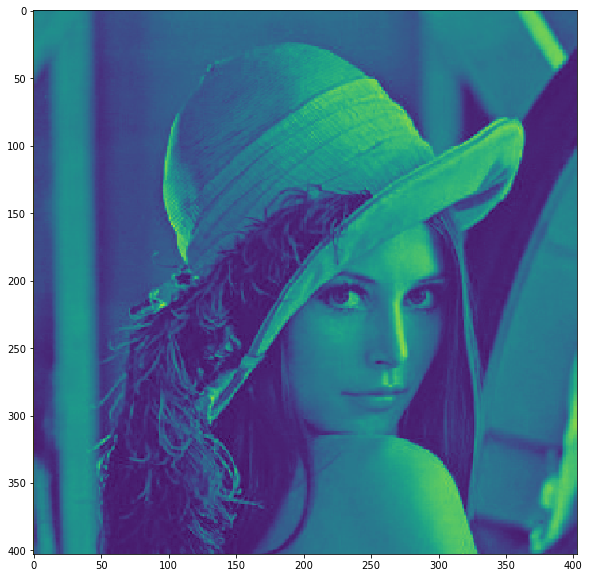

In [3]:
img = cv2.cvtColor(cv2.imread('lena.png'), cv2.COLOR_BGR2GRAY)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

In [4]:
## Definição de todas as máscaras dos filtros 

#horizontal
# kernel = np.array([
# [-1, 0, 1], 
# [-2, 0, 2], 
# [-1, 0, 1]
#                 ]) 
#laplacian
kernel = np.array([
[0 ,-1 , 0], 
[-1, 4 ,-1], 
[0 , -1, 0]]) 

# #media
# kernel = np.array([
# [1,  1,  1],
# [1,  1,  1],
# [1,  1,  1]]) 

# #gauss
# kernel = np.array([
# [1,  2,  1],
# [2,  4,  2],
# [1,  2,  1]]) 

#vertical
# kernel = np.array([
# [-1, -2, -1],
# [ 0,  0,  0],
# [ 1,  2,  1]]) 


## Convolução

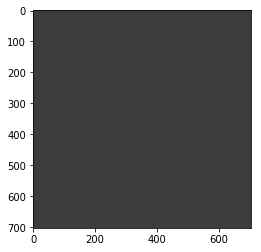

Saída do filtro passa-alta. Cinza escura representa pixels negativos. Cinza clara representa pixels positivos


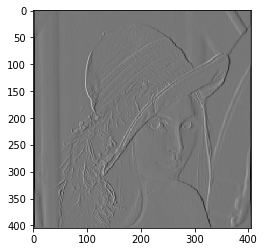

In [12]:
def filter2dconv(image, kernel):
    x1 = int(np.floor(kernel.shape[0]/2)) 
    y1 = int(np.floor(kernel.shape[1]/2)) 
    
    saida =  np.zeros((image.shape[0], image.shape[1])) 
    image1 = np.pad(image, 50) 

    for x in range(image.shape[0]-2):
        for y in range(image.shape[1]-2): 
            saida[x,y] = np.sum(image[x:x+3,y:y+3]* kernel) 
        return saida 

result = filter2dconv(img, kernel) 
result = np.pad(result, 150) 
plt.imshow(result, cmap="gray") 
plt.show() 

result = scipy.signal.convolve2d(img,kernel) 
plt.imshow(result, cmap="gray") 
plt.show() 

## Correlação

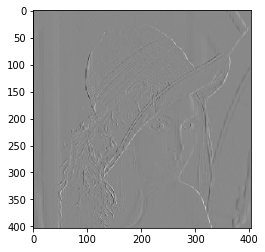

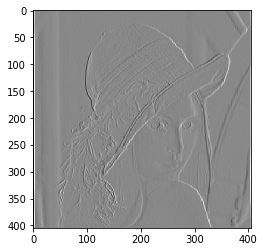

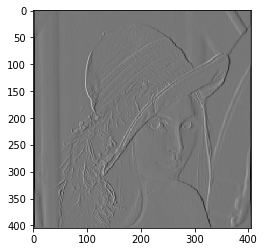

In [6]:
from math import floor 
kernel = np.array([
                    [1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]
                ]) 

def filter2dcorr(image, kernel):
    x1 = int(np.floor(kernel.shape[0]/2)) 
    y1 = int(np.floor(kernel.shape[1]/2)) 

    saida = np.zeros((image.shape[0], image.shape[1])) 
    image1 = np.pad(image, x1) 
    
    for x in range(image.shape[0]): 
        for y in range(image.shape[1]): 
            for i in range(-x1,x1): 
                for j in range(-y1,y1): 
                    saida[x,y] += kernel[i,j] * image1[x-i,y-j] 
    return saida 

result = filter2dcorr(img, kernel) 
plt.imshow(result, cmap="gray") 
plt.show() 

result = scipy.signal.correlate2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()

result = scipy.signal.convolve2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()